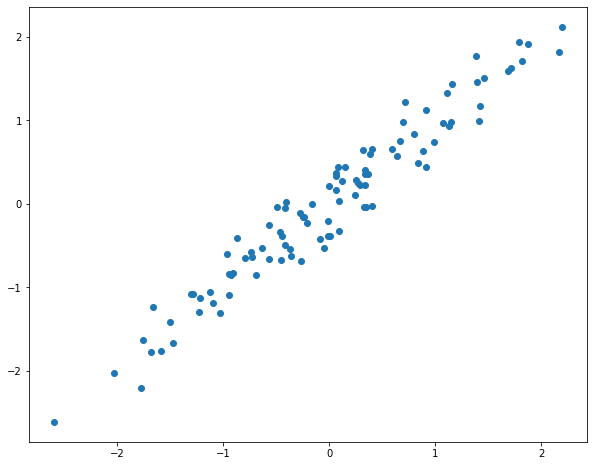

In [120]:

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from sklearn import datasets, preprocessing

X, y, coef = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

# X = preprocessing.normalize(X)
# y = preprocessing.normalize(y)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))

x_train = torch.from_numpy(X).float()
y_train = torch.from_numpy(y).float()

x_train
y_train.view(-1,1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_train, y_train, 'o')

In [121]:
# Linear Regression
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [124]:

model = LinearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

# 开始训练
num_epochs = 50000
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

model.eval()
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

loss: 0.058271
Epoch[38600/50000], loss: 0.058271
Epoch[38620/50000], loss: 0.058271
Epoch[38640/50000], loss: 0.058271
Epoch[38660/50000], loss: 0.058271
Epoch[38680/50000], loss: 0.058271
Epoch[38700/50000], loss: 0.058271
Epoch[38720/50000], loss: 0.058271
Epoch[38740/50000], loss: 0.058271
Epoch[38760/50000], loss: 0.058271
Epoch[38780/50000], loss: 0.058271
Epoch[38800/50000], loss: 0.058271
Epoch[38820/50000], loss: 0.058271
Epoch[38840/50000], loss: 0.058271
Epoch[38860/50000], loss: 0.058271
Epoch[38880/50000], loss: 0.058271
Epoch[38900/50000], loss: 0.058271
Epoch[38920/50000], loss: 0.058271
Epoch[38940/50000], loss: 0.058271
Epoch[38960/50000], loss: 0.058271
Epoch[38980/50000], loss: 0.058271
Epoch[39000/50000], loss: 0.058271
Epoch[39020/50000], loss: 0.058271
Epoch[39040/50000], loss: 0.058271
Epoch[39060/50000], loss: 0.058271
Epoch[39080/50000], loss: 0.058271
Epoch[39100/50000], loss: 0.058271
Epoch[39120/50000], loss: 0.058271
Epoch[39140/50000], loss: 0.058271
Epoch

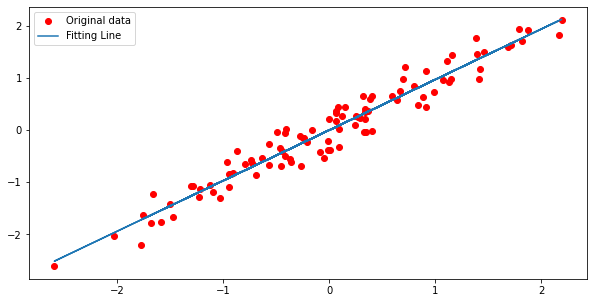

In [125]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()
